<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-5/blob/main/DSML_59_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ-5. Домашнее задание: EDA и улучшение качества модели (California Housing)

Цель: провести разведочный анализ, отобрать признаки, убрать выбросы и трансформировать данные, чтобы снизить RMSE и повысить R² для модели линейной регрессии.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head())
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [4]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_pred_test))
r2_train   = r2_score(y_train, y_pred_train)
r2_test    = r2_score(y_test,  y_pred_test)

print(f"Все переменные RMSE (train)={rmse_train:.3f}, (test)={rmse_test:.3f}")
print(f"Все переменные R2   (train)={r2_train:.3f}, (test)={r2_test:.3f}")


Все переменные RMSE (train)=0.720, (test)=0.746
Все переменные R2   (train)=0.613, (test)=0.576


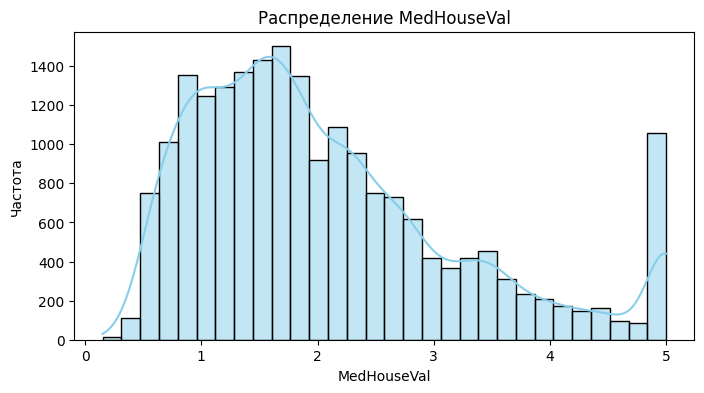

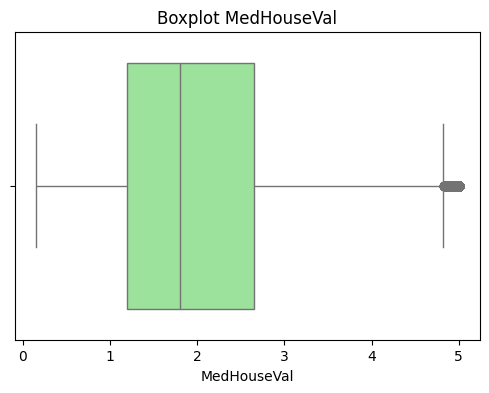

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Распределение MedHouseVal')
plt.xlabel('MedHouseVal'); plt.ylabel('Частота')
plt.show()

# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=y, color='lightgreen')
plt.title('Boxplot MedHouseVal')
plt.show()

Наблюдаются редкие высокие значения — выбросы.

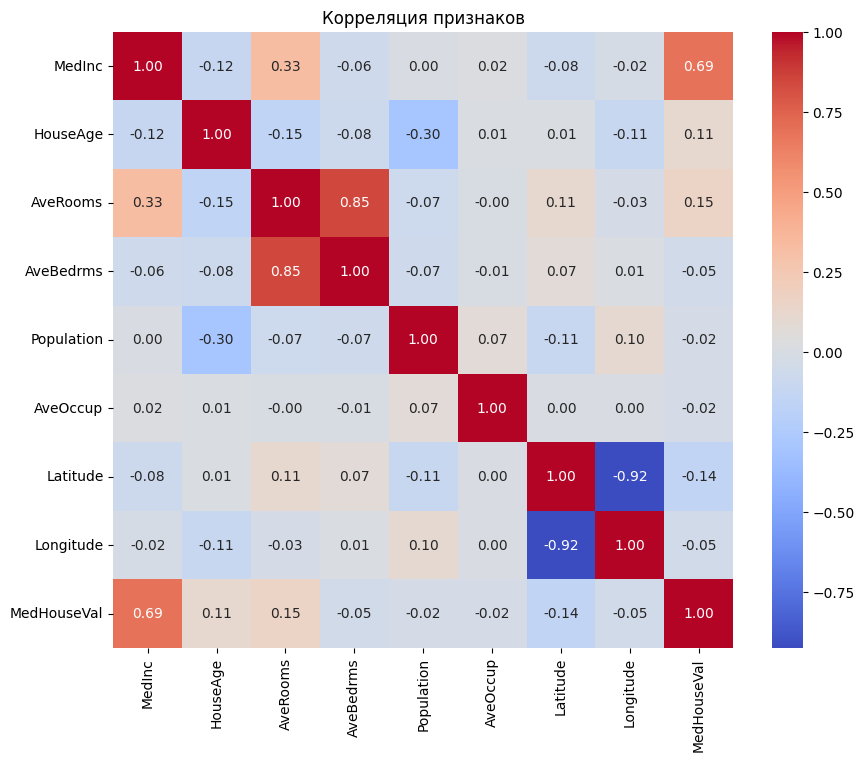

Отобранные признаки: ['MedInc']


In [14]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Выбераю признаки с |corr| ≥ 0.5 с MedHouseVal
strong = corr['MedHouseVal'].abs() >= 0.5
selected = strong[strong].index.drop('MedHouseVal').tolist()
print("Отобранные признаки:", selected)
